# homework3.1_1 dithering Code

## dithering 代码

```c++
#include <TFile.h>
#include <TTree.h>
#include <TString.h>
#include <TRandom3.h>

void dithering()
{
	//打开s4.root文件,继承tree
	TFile * ipf = new TFile("../s4.root");
	if (ipf->IsZombie())
  	{
      		cout << "Error opening file" << endl;
          	exit(-1);
	}
	ipf->cd();
	TTree * ipt = (TTree *)ipf->Get("tree");

	//ipf中Branch以及参量
	Int_t pe[48],re[48];
	for(Int_t i = 0;i<48;i++)
	{
		pe[i] = -1.0;
		re[i] = -1.0;
	}

	ipt->SetBranchAddress("pe",&pe);
	ipt->SetBranchAddress("re",&re);

	//新root文件与tree
	TFile * opf = new TFile("../s4dith.root","recreate");
	TTree * opt = new TTree("tree","dithering");
	
	//新root文件变量,与新Branch
	Double_t pedith[48],redith[48];

	opt->Branch("pedith",&pedith,"pedith[48]/D");
	opt->Branch("redith",&redith,"redith[48]/D");

	//随机数
	TRandom3 * gr = new TRandom3(0);

	//遍历事件，加入（0，1）随计数
	Long64_t nentries = ipt->GetEntries();
	for(Long64_t jentry = 0; jentry<nentries;jentry++)
	{
		ipt->GetEntry(jentry);
		for(Int_t i = 0;i<48;i++)
		{
			pedith[i] = pe[i] + gr->Uniform(0,1);
			redith[i] = re[i] + gr->Uniform(0,1);
		}
		opt->Fill();
		if(jentry%100000==0) cout<<"process "<<jentry<<" of "<<nentries<<endl;
	}
	opt->Write();
	opf->Close();
	ipf->Close();
}
```

## check

In [1]:
TFile *ipf = new TFile("s4dith.root","read");
TTree * tree = (TTree*)ipf->Get("tree");
TCanvas *c1 =  new TCanvas();

In [2]:
tree->Print();

******************************************************************************
*Tree    :tree      : dithering                                              *
*Entries :  5790825 : Total =      4447613336 bytes  File  Size = 2977772956 *
*        :          : Tree compression factor =   1.49                       *
******************************************************************************
*Br    0 :pedith    : pedith[48]/D                                           *
*Entries :5790825 : Total  Size= 2223806488 bytes  File Size  = 1482779425 *
*Baskets :     1391 : Basket Size=    3200512 bytes  Compression=   1.50     *
*............................................................................*
*Br    1 :redith    : redith[48]/D                                           *
*Entries :5790825 : Total  Size= 2223806488 bytes  File Size  = 1494965665 *
*Baskets :     1391 : Basket Size=    3200512 bytes  Compression=   1.49     *
*.......................................................

In [3]:
tree->Scan("pedith:redith","pedith>0&& redith>0","",1000,1);//第4参数-事件数，第5参数-起始事件编号
//jupyter上的Scan必须指定第4个参数(事件数)

***********************************************
*    Row   * Instance *    pedith *    redith *
***********************************************
*       54 *        1 * 1139.7651 * 876.45273 *
*      124 *       15 * 914.95815 * 156.13581 *
*      198 *       22 * 1057.4589 * 794.56490 *
*      305 *       35 * 1031.5943 * 106.69558 *
*      313 *       12 *  946.1501 * 710.26927 *
*      395 *       35 * 377.51268 * 157.08704 *
*      805 *       41 * 886.34461 * 822.60018 *
*      812 *       20 * 1066.4174 * 79.331253 *
*      838 *       40 * 1392.3979 * 1307.4033 *
*      958 *       22 * 1415.5214 * 1350.1644 *
***********************************************
==> 10 selected entries


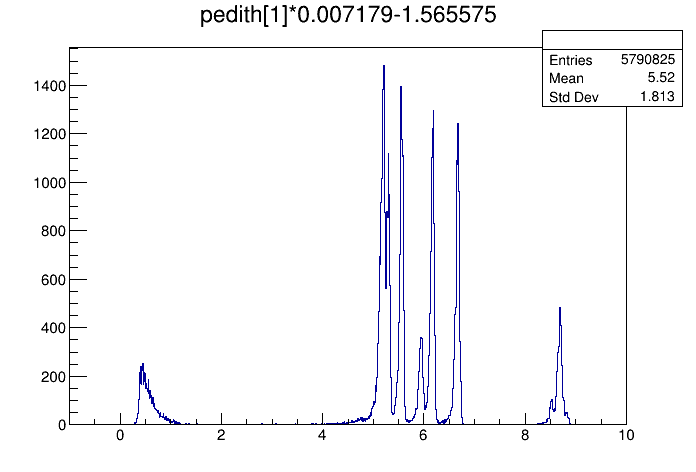

In [4]:
tree->Draw("pedith[1]*0.007179-1.565575>>(1000,-1,10)");
c1->Draw();

In [5]:
ipf->Close();

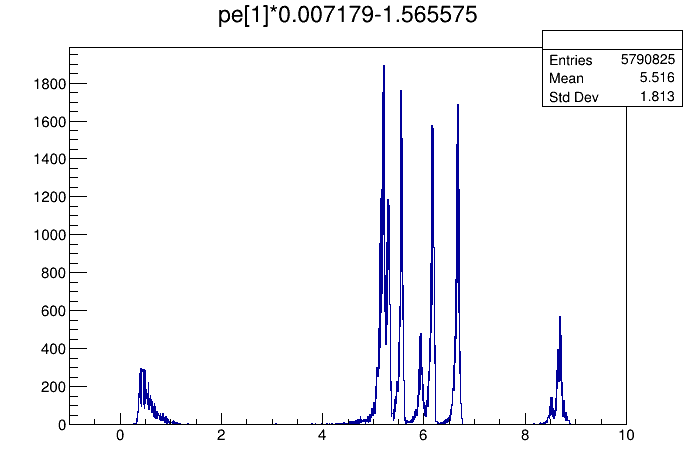

In [6]:
ipf = new TFile("s4.root","read");
tree = (TTree*)ipf->Get("tree");
tree->Draw("pe[1]*0.007179-1.565575>>(1000,-1,10)");
c1->Draw();

In [7]:
ipf->Close();

## 小结
**对比发现连续化之后加入刻度系数没有了锯齿，谱更加圆滑！**

In [8]:
!jupyter nbconvert homework3.1_1_dithering.ipynb --to html

[NbConvertApp] Converting notebook homework3.1_1_dithering.ipynb to html


